In [25]:
import collections
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../resources/data/initial_users_data_lucianobajr.csv', encoding='utf-8')

In [7]:
df

,Nome de usuário,ID,AvatarURL,GravatarID,URL,HTMLURL,FollowersURL,FollowingURL,GistsURL,StarredURL,...,Hireable,Bio,PublicRepos,PublicGists,Followers,Following,CreatedAt,UpdatedAt,Following Users,Followers Users
0,otaviolemos,1864126,https://avatars.githubusercontent.com/u/186412...,NaN,https://api.github.com/users/otaviolemos,https://github.com/otaviolemos,https://api.github.com/users/otaviolemos/follo...,https://api.github.com/users/otaviolemos/follo...,https://api.github.com/users/otaviolemos/gists...,https://api.github.com/users/otaviolemos/starr...,...,NaN,Associate Professor @ ICT-UNIFESP.\r\nSeeker o...,35,4,1223,1,2012-06-18 18:49:09+00:00,2023-10-13 12:35:55+00:00,norvig,"berlotto, eugeniomiro, brasten, maykon, cassio..."
1,gfviegas,6178801,https://avatars.githubusercontent.com/u/617880...,NaN,https://api.github.com/users/gfviegas,https://github.com/gfviegas,https://api.github.com/users/gfviegas/followers,https://api.github.com/users/gfviegas/followin...,https://api.github.com/users/gfviegas/gists{/g...,https://api.github.com/users/gfviegas/starred{...,...,NaN,Head of Technology at Hubs Contabilidade.,87,11,82,80,2013-12-13 13:53:47+00:00,2023-09-28 11:26:20+00:00,"josevalim, luizdamim, flaviovdf, denislins, sa...","emfol, phinfonet, marlonassuncao, emersonpc, t..."
2,rodrigobranas,7491283,https://avatars.githubusercontent.com/u/749128...,NaN,https://api.github.com/users/rodrigobranas,https://github.com/rodrigobranas,https://api.github.com/users/rodrigobranas/fol...,https://api.github.com/users/rodrigobranas/fol...,https://api.github.com/users/rodrigobranas/gis...,https://api.github.com/users/rodrigobranas/sta...,...,NaN,"Software Architect, Professor, Author and Speaker",206,2,5823,3,2014-05-05 17:15:18+00:00,2023-05-15 13:52:21+00:00,"felipefialho, NandoMB, MateusMFX","charlenopires, danieldocki, souzaonofre, joels..."
3,guiaguiar27,17009319,https://avatars.githubusercontent.com/u/170093...,NaN,https://api.github.com/users/guiaguiar27,https://github.com/guiaguiar27,https://api.github.com/users/guiaguiar27/follo...,https://api.github.com/users/guiaguiar27/follo...,https://api.github.com/users/guiaguiar27/gists...,https://api.github.com/users/guiaguiar27/starr...,...,NaN,Computer Science student,41,23,40,65,2016-02-01 16:26:42+00:00,2023-09-29 14:00:54+00:00,"greut, geohot, pavelmaca, flaviovdf, adamdunke...","esin, sw3luke, gfviegas, canesche, badain, vin..."
4,lazarobodevan,23053276,https://avatars.githubusercontent.com/u/230532...,NaN,https://api.github.com/users/lazarobodevan,https://github.com/lazarobodevan,https://api.github.com/users/lazarobodevan/fol...,https://api.github.com/users/lazarobodevan/fol...,https://api.github.com/users/lazarobodevan/gis...,https://api.github.com/users/lazarobodevan/sta...,...,NaN,Computer science student at the Federal Univer...,33,0,18,15,2016-10-25 11:30:58+00:00,2023-08-17 18:37:13+00:00,"jamesmontemagno, adrianomqsmts, GuilhermeCorre...","piface314, adrianomqsmts, GuilhermeCorreaSouza..."
5,gegen07,26390780,https://avatars.githubusercontent.com/u/263907...,NaN,https://api.github.com/users/gegen07,https://github.com/gegen07,https://api.github.com/users/gegen07/followers,https://api.github.com/users/gegen07/following...,https://api.github.com/users/gegen07/gists{/gi...,https://api.github.com/users/gegen07/starred{/...,...,True,@pysal,43,9,660,108,2017-03-13 19:03:07+00:00,2023-10-01 11:42:48+00:00,"mourner, rgommers, sjsrey, leouieda, mrocklin,...","guipmourao, esin, elcarvalho, gustavo-depaula,..."
6,kristtopher,26818164,https://avatars.githubusercontent.com/u/268181...,NaN,https://api.github.com/users/kristtopher,https://github.com/kristtopher,https://api.github.com/users/kristtopher/follo...,https://api.github.com/users/kristtopher/follo...,https://api.github.com/users/kristtopher/gists...,https://api.github.com/users/kristtopher/starr...,...,NaN,Bachelor of Computer Science.,11,0,10,4,2017-03-31 13:09:51+00:00,2023-03-13 14:41:27+00:00,"caiofers, piface314, ComputerArchitectu

In [8]:
# Crie um grafo direcionado no NetworkX
G = nx.DiGraph()

# Adicione nós para os usuários
for _, row in df.iterrows():
    G.add_node(row["Nome de usuário"])
    
    # Adicione as relações de seguindo (following)
    following_users = str(row["Following Users"]).split(", ")
    for following_user in following_users:
        if following_user.strip():  # Verifique se a string não está vazia
            G.add_edge(row["Nome de usuário"], following_user)
        
    # Adicione as relações de seguidores (followers)
    followers_users = str(row["Followers Users"]).split(", ")
    for follower_user in followers_users:
        if follower_user.strip():  # Verifique se a string não está vazia
            G.add_edge(follower_user, row["Nome de usuário"])

# Análise da Estrutura da rede

A rede analisada refere-se à rede de usuários do GitHub, uma plataforma de desenvolvimento colaborativo de software. Nesta rede, os "nós" representam os usuários individuais do GitHub, cada um com um perfil que inclui informações pessoais, repositórios de código-fonte, atividades, seguidores e usuários que estão seguindo. Os "arestas" na rede representam as conexões entre os usuários, que podem ser de dois tipos:

Seguindo (`Following`): Uma aresta entre o usuário A e o usuário B indica que o usuário A está seguindo o usuário B.

Seguidores (`Followers`): Uma aresta entre o usuário B e o usuário A indica que o usuário B está seguindo o usuário A.

Em resumo, os "nós" são os perfis de usuários individuais no GitHub, e as "arestas" representam as conexões de "seguindo" e "seguidores" entre esses usuários. A rede é usada para rastrear o relacionamento de seguidores e seguindo de usuários, bem como para facilitar a colaboração e a descoberta de projetos de código aberto e repositórios interessantes. A análise dessa rede pode fornecer insights sobre a interação e a influência dos usuários na plataforma do GitHub.

Abaixo Temos o números de nós e arestas do grafo

In [11]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f'numero de nós {num_nodes}')
print(f'numero de arestas {num_edges}')


numero de nós 8100
numero de arestas 9868


In [27]:
nx.draw(G, with_labels=True)
plt.show()

## Distribuição de nós

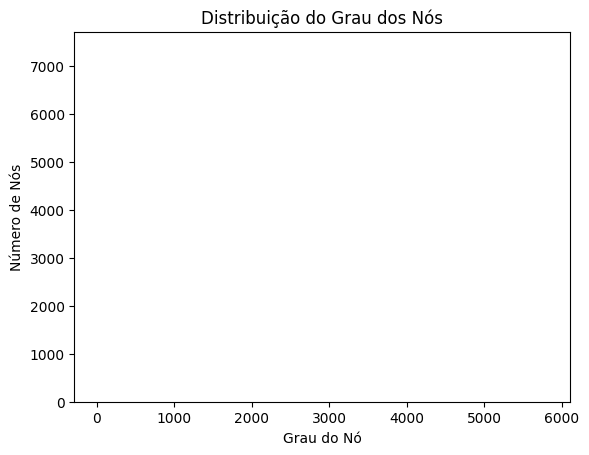

In [26]:
in_degrees = dict(G.in_degree())
in_degree_sequence = list(in_degrees.values())

# Calcule a distribuição do grau
degree_counts = collections.Counter(in_degree_sequence)

# Ordene os graus e suas contagens
degree, count = zip(*degree_counts.items())

# Plote a distribuição do grau
plt.bar(degree, count)
plt.xlabel('Grau do Nó')
plt.ylabel('Número de Nós')
plt.title('Distribuição do Grau dos Nós')
plt.show()

In [ ]:
# d) Coeficiente de Clusterização
cluster_coefficients = nx.clustering(G)
average_cluster_coefficient = sum(cluster_coefficients.values()) / len(cluster_coefficients)
print(f'Coeficiente de Clusterização Global: {average_cluster_coefficient:.2f}')


In [ ]:
# Calcular o diâmetro em cada componente fortemente conectado
strongly_connected_components = list(nx.strongly_connected_components(G))
diameters = []
for component in strongly_connected_components:
    subgraph = G.subgraph(component)
    if subgraph.number_of_nodes() > 1:
        diameter = nx.diameter(subgraph)
        diameters.append(diameter)
    else:
        diameters.append(0)

print(f'Diâmetros dos componentes fortemente conectados: {diameters}')


In [ ]:
# Calcular os graus dos nodos
degrees = dict(G.degree())  # Dicionário com os graus dos nodos

# Plotar a distribuição de grau com nodos
plt.figure(figsize=(12, 6))
plt.hist(list(degrees.values()), bins=50, density=True, alpha=0.7, color='b')
plt.xlabel('Grau dos Nodos')
plt.ylabel('Densidade')
plt.title('Distribuição de Grau dos Nodos')
plt.show()

In [ ]:
# Calcule a distribuição de grau em escala log-log
log_degrees = np.log(degrees)
log_counts = np.log([degrees.count(degree) for degree in degrees])

# Ajuste uma reta (regressão linear) para os dados log-log
coefficients = np.polyfit(log_degrees, log_counts, 1)

# O coeficiente alfa é o coeficiente angular da reta de melhor ajuste
alfa = -coefficients[0]

print(f'Coeficiente alfa estimado: {alfa}')


In [ ]:
# Calcule o grau médio do grafo
average_degree = sum(degrees) / len(degrees)
print(f'Grau médio do grafo: {average_degree}')

In [ ]:
# Layout do grafo com layout fruchterman_reingold
pos = nx.spring_layout(G, k=0.2)

# Plote o grafo
plt.figure(figsize=(16, 16))

# Desenhe os rótulos dos nós
nx.draw_networkx_labels(G, pos, font_color='black', font_size=8)

# Ajuste o tamanho dos nós
node_size = 50

# Desenhe o grafo
nx.draw(G, pos=pos, node_size=node_size, with_labels=False, alpha=0.6, node_color='blue', edge_color='gray')

plt.title("Grafo de Relações do GitHub")
plt.show()


In [ ]:
nx.write_gml(G, "../resources/gephi/graph_lucianobajr.gml")